In [1]:
#Load the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from fuzzywuzzy import process

In [2]:
# Load the files into data frames 
purchase_df = pd.read_csv('./QVI_purchase_behaviour.csv')
transaction_df = pd.read_csv('./transaction_data.csv')

**Exploratory Data Analysis**


Analyzing datasets to understand their characteristics and refining them to meet the specific requirements of our analysis

In [3]:
# Understanding data structure inc. examining data types and the count of null values
purchase_df.info()
purchase_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget


In [4]:
# Understanding data structure inc. examining data types and the count of null values
transaction_df.info()
transaction_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


In [5]:
# Seperate the PROD_NAME column into three columns: Weight, Brandname and Productname
transaction_df[['TEXT', 'WEIGHT']] = transaction_df['PROD_NAME'].str.extract(r'^(.*?)(\d+[gG])$')
transaction_df['BRAND_NAME']=transaction_df['TEXT'].str.split().str[0]
transaction_df['PRODUCT_TYPE']=transaction_df['TEXT'].str.split().str[-1]
transaction_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TEXT,WEIGHT,BRAND_NAME,PRODUCT_TYPE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSalt,175g,Natural,SeaSalt
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese,175g,CCs,Cheese
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken,170g,Smiths,Chicken


In [6]:
#Drop unnecessary cols
transaction_df= transaction_df.drop(['PROD_NAME', 'TEXT'], axis= 1)
transaction_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,BRAND_NAME,PRODUCT_TYPE
0,43390,1,1000,1,5,2,6.0,175g,Natural,SeaSalt
1,43599,1,1307,348,66,3,6.3,175g,CCs,Cheese
2,43605,1,1343,383,61,2,2.9,170g,Smiths,Chicken


In [7]:
# Convert the integer column to datetime
transaction_df['DATE']= pd.to_datetime(transaction_df['DATE'], unit='D',origin='1899-12-30')
transaction_df['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [8]:
df1 = pd.merge(transaction_df, purchase_df, on="LYLTY_CARD_NBR")
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,BRAND_NAME,PRODUCT_TYPE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,2,6.0,175g,Natural,SeaSalt,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,3,6.3,175g,CCs,Cheese,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,2,2.9,170g,Smiths,Chicken,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,5,15.0,175g,Smiths,S/Cream&Onion,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,3,13.8,150g,Kettle,Chili,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,2,10.8,175g,Kettle,Cream,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,1,4.4,175g,Tostitos,Lime,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,2,8.8,170g,Doritos,Mexicana,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,2,7.8,150g,Doritos,Jalapeno,YOUNG SINGLES/COUPLES,Premium


In [9]:
#Drop rows with null value after merge
df1.dropna(inplace=True)
df1.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_QTY            0
TOT_SALES           0
WEIGHT              0
BRAND_NAME          0
PRODUCT_TYPE        0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [10]:
#Search for outliers through max and 75% quartile 
df1.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,261579,261579.000000,2.615790e+05,2.615790e+05,261579.000000,261579.000000,261579.000000
mean,2018-12-30 00:11:18.439782912,135.071776,1.355362e+05,1.351495e+05,56.503259,1.907309,7.295404
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756550e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303610e+05,1.351530e+05,55.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030940e+05,2.026985e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.794462,8.052173e+04,7.814452e+04,33.022515,0.646633,3.097605


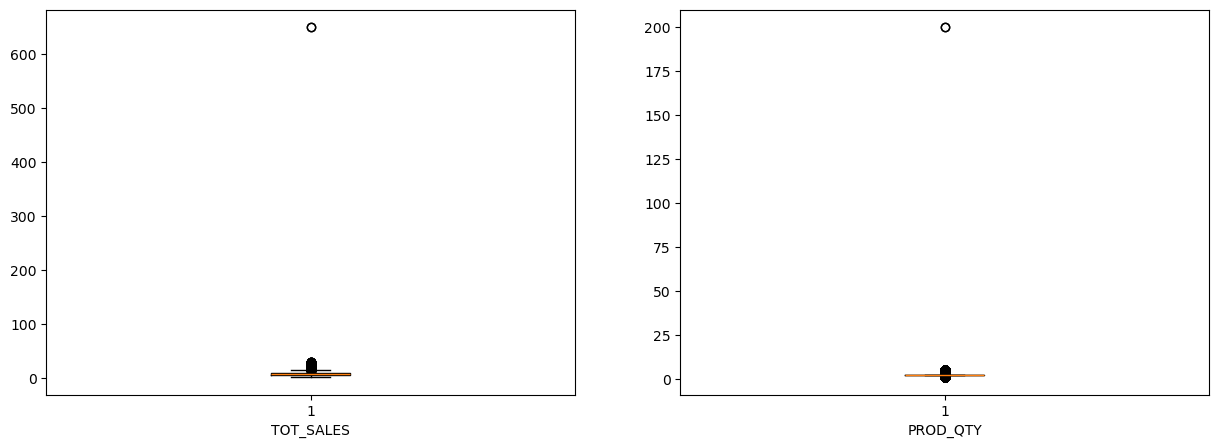

In [11]:
#Search for outliers on TotalSales and Product Quantity
figure, axis = plt.subplots(1, 2, figsize=(15, 5))
axis[0].boxplot(df1['TOT_SALES'])
axis[0].set_xlabel('TOT_SALES')
axis[1].boxplot(df1['PROD_QTY'])
axis[1].set_xlabel('PROD_QTY')
plt.show()


In [12]:
#Removing the outliers via sub-setting
filtered_df = df1[(df1['TOT_SALES'] < 100) & (df1['PROD_QTY'] < 25)]
filtered_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,BRAND_NAME,PRODUCT_TYPE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,2,6.0,175g,Natural,SeaSalt,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,3,6.3,175g,CCs,Cheese,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,2,2.9,170g,Smiths,Chicken,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,5,15.0,175g,Smiths,S/Cream&Onion,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,3,13.8,150g,Kettle,Chili,MIDAGE SINGLES/COUPLES,Budget


In [13]:
#Checking whetheor or not the brands name have been mistyped
filtered_df['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [14]:
#correct mistyped brand_named via fuzzywuzzy
correct_brands = ['Infuzions', 'Doritos', 'Sunbites', 'RRD', 'Grain Waves','Woolworths','Smiths',"Natural Chip Co",
                  'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos','Old El Paso','Cheetos','Pringles','Tyrrells',
                   'Twisties', 'Thins', 'Burger', 'Cheezels','Cobs', 'French',  'Tostitos']

def correct_brand_name(BRAND_NAME, correct_brands):
    best_match = process.extractOne(BRAND_NAME, correct_brands)
    return best_match[0]

filtered_df['CORRECTED_BRAND_NAME'] = filtered_df['BRAND_NAME'].apply(correct_brand_name, args=(correct_brands,))
filtered_df.head(3)


C:\Users\pyaku\AppData\Local\Temp\ipykernel_7760\3589567806.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CORRECTED_BRAND_NAME'] = filtered_df['BRAND_NAME'].apply(correct_brand_name, args=(correct_brands,))


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,BRAND_NAME,PRODUCT_TYPE,LIFESTAGE,PREMIUM_CUSTOMER,CORRECTED_BRAND_NAME
0,2018-10-17,1,1000,1,5,2,6.0,175g,Natural,SeaSalt,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co
1,2019-05-14,1,1307,348,66,3,6.3,175g,CCs,Cheese,MIDAGE SINGLES/COUPLES,Budget,CCs
2,2019-05-20,1,1343,383,61,2,2.9,170g,Smiths,Chicken,MIDAGE SINGLES/COUPLES,Budget,Smiths


In [15]:
filtered_df['CORRECTED_BRAND_NAME'].unique()

array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Old El Paso',
       'Grain', 'Doritos', 'Twisties', 'Grain Waves', 'Thins', 'Burger',
       'Cheezels', 'Infuzions', 'RRD', 'Pringles', 'Tyrrells', 'Cobs',
       'Woolworths', 'French', 'Tostitos', 'Cheetos', 'Sunbites'],
      dtype=object)

**Data Analysis and Visualization**

In [16]:
#understanding the total sales volume for each date in the dataset
x= filtered_df.groupby('DATE')['TOT_SALES'].sum()
x

#Calculating mean sales
mean_sales = x.mean()

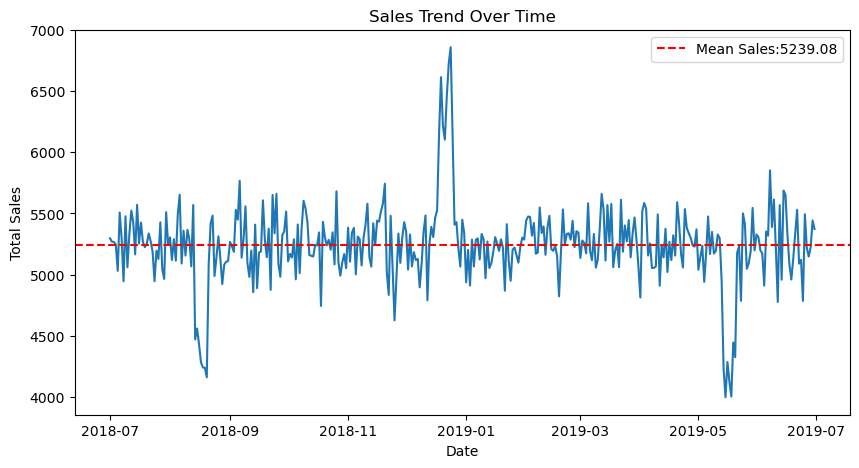

In [17]:
#Visualizing sales by date
plt.figure(figsize=(10, 5))
plt.plot(x.index, x.values)
plt.axhline(y=mean_sales, color='r', linestyle='--', label=f'Mean Sales:{mean_sales:.2f}')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(loc='best')
plt.show()

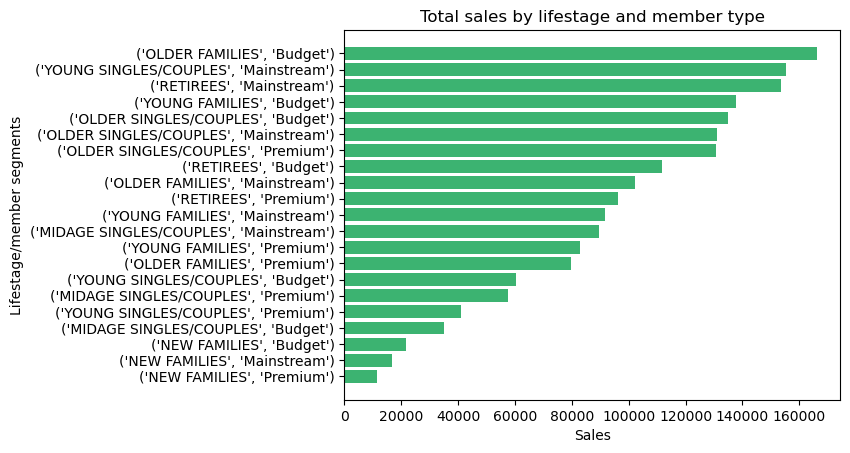

<Figure size 1200x800 with 0 Axes>

In [18]:
# Breakdown of the total sales by lifestage and member type
z = filtered_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=True)
plt.barh(z.index.map(str), z.values, color= 'mediumseagreen')
plt.xlabel('Sales')
plt.ylabel('Lifestage/member segments')
plt.title('Total sales by lifestage and member type')
plt.figure(figsize=(12, 8))
plt.show()

In [19]:
#Calculate Total Sum to add % label
sum_sales = filtered_df['TOT_SALES'].sum().round()
sum_sales

1907025.0

In [21]:
# Group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER', then sum the 

f = filtered_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum().unstack('PREMIUM_CUSTOMER')

# Calculate the total sales for sorting and Remove the 'Total' column before plotting
f['Total'] = f.sum(axis=1)
f = f.sort_values(by='Total')
f= f.drop(columns='Total', axis=1)
f


PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
NEW FAMILIES,5499,4247,2932
MIDAGE SINGLES/COUPLES,9399,22391,15340
YOUNG SINGLES/COUPLES,16491,38097,11200
YOUNG FAMILIES,36701,24767,22128
RETIREES,28411,40019,24549
OLDER FAMILIES,44538,27493,21524
OLDER SINGLES/COUPLES,34748,34458,33580


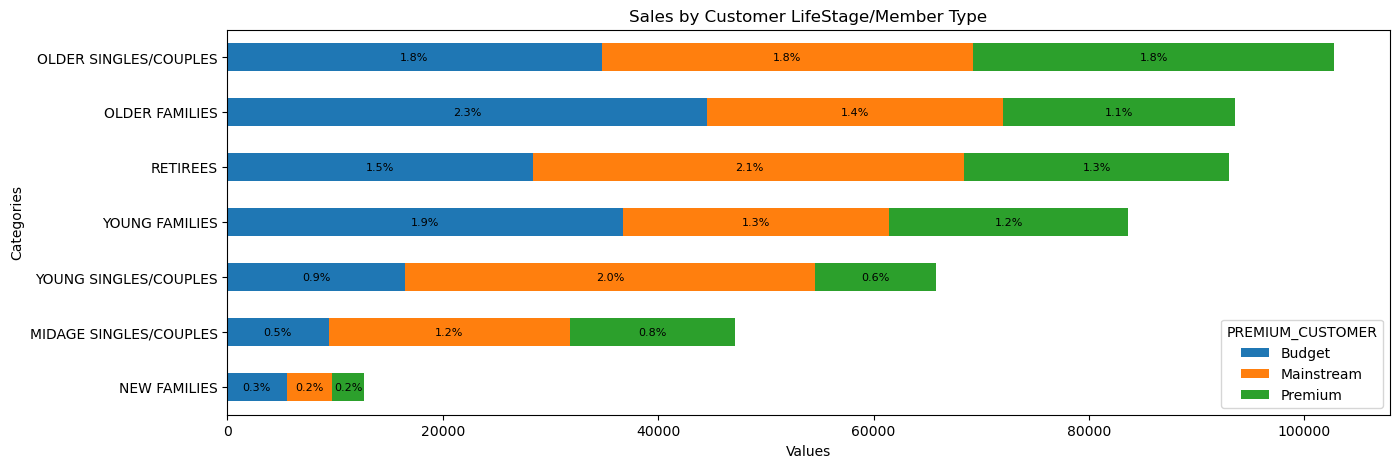

In [22]:
# Your existing code to create the bar chart
ax = f.plot(kind='barh', stacked=True, figsize=(15, 5))

# Add labels to the bars
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    label = width / sum_sales * 100
    x = i.get_x()
    y = i.get_y()

    label_text = f'{label:.1f}%'

    # Set label positions
    label_x = x + width /2
    label_y = y + height/2

    # Only plot labels for bars with width greater than 0
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

ax.set_xlabel('Values')
ax.set_ylabel('Categories')
ax.set_title('Sales by Customer LifeStage/Member Type')

plt.show()

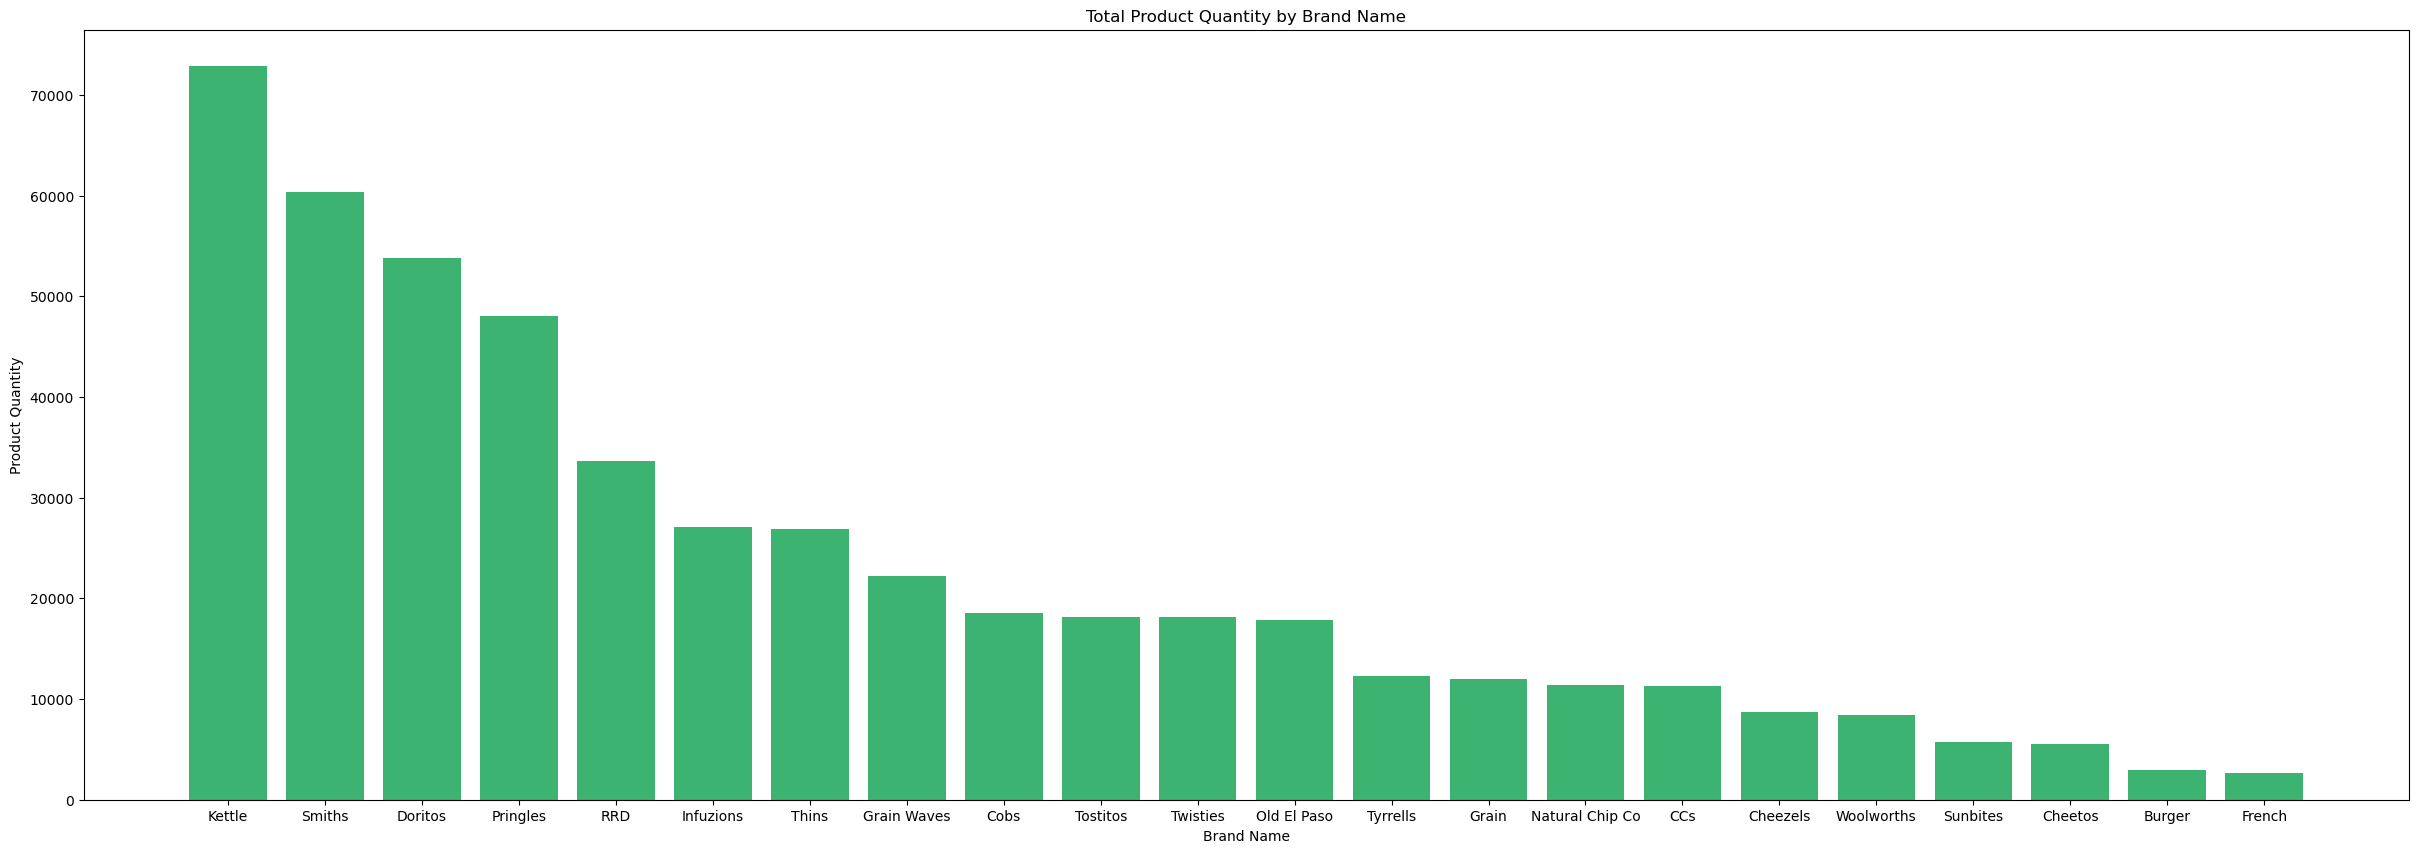

In [84]:
z = filtered_df.groupby('CORRECTED_BRAND_NAME')['PROD_QTY'].sum().sort_values(ascending=False)
plt.figure(figsize=(30,10))
plt.bar(z.index, z.values, color= 'mediumseagreen')
plt.xlabel('Brand Name')
plt.ylabel('Product Quantity')
plt.title('Total Product Quantity by Brand Name')
plt.show()

In [87]:
p = filtered_df.groupby('WEIGHT')['PROD_QTY'].sum().sort_values(ascending= False)
p = pd.DataFrame(p)

total_sales = p['PROD_QTY'].sum()

p['percentage_of_sales'] = p['PROD_QTY']/total_sales * 100

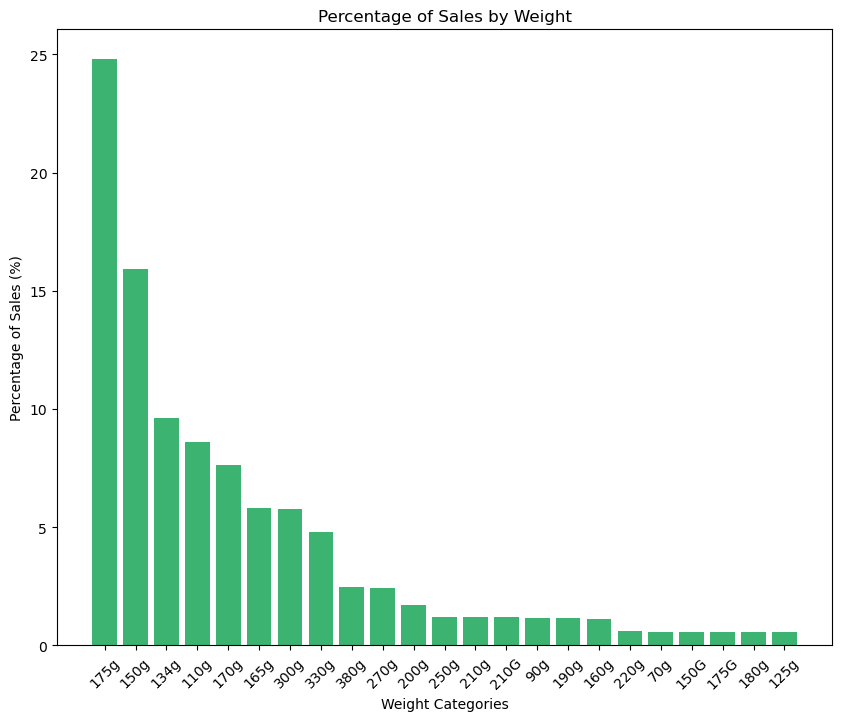

In [86]:
p = filtered_df.groupby('WEIGHT')['PROD_QTY'].sum().sort_values(ascending= False)
p = pd.DataFrame(p)

total_sales = p['PROD_QTY'].sum()

p['percentage_of_sales'] = p['PROD_QTY']/total_sales * 100

plt.figure(figsize=(10, 8))
plt.bar(p.index, p['percentage_of_sales'],color= 'mediumseagreen')
plt.title('Percentage of Sales by Weight')
plt.xlabel('Weight Categories')
plt.ylabel('Percentage of Sales (%)')
plt.xticks(rotation=45)
plt.show()

**Insights with Suggestions**

1) Segments relating to older generations buy the most amount of chips:
Influence marketing strategies and product offerings tailored towards older consumers

2) Kettle, Smiths and Doritos are top selling products, with Cheetos , Burger and French being the last
Optimize inventory management, production planning, and marketing efforts by focusing more on popular products and possibly reconsidering or repositioning less popular ones

3) Package weights of 175g, 150g, and 134g collectively contribute approximately 50% of total sales:
Highlights the importance of these specific package sizes in the product mix